In [32]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import cv2
import imageio
import glob
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from scipy import ndimage

from tensorflow.keras.models import load_model

In [0]:
Model = load_model(r'/content/gdrive/My Drive/ImageProcessing/Model_Zero-DCE_2.h5')

In [35]:
path = r'/content/gdrive/My Drive/LOLdataset/our485/high'

all_files = glob.glob(path + "/*.png")

high = list()

all_files.sort()

for fileName in all_files:
        
        
        img = imageio.imread(fileName)
        
            
        high.append(img)
        
        
high = np.array(high)


path = r'/content/gdrive/My Drive/LOLdataset/our485/low'

all_files = glob.glob(path + "/*.png")

all_files.sort()

low = list()

for fileName in all_files:
        
        
        img = imageio.imread(fileName)
        
            
        low.append(img)
        
low = np.array(low)

print(high.shape)
print(low.shape)

(480, 400, 600, 3)
(480, 400, 600, 3)


In [36]:
inputs = keras.Input(shape=(None, None, 3), name='img')

out1 = layers.Conv2D(32, (3,3), activation='relu', padding="same", strides=(1, 1))(inputs)

out2 = layers.Conv2D(32, (3,3), activation='relu', padding="same", strides=(1, 1))(out1)

out3 = layers.Conv2D(32, (3,3), activation='relu', padding="same", strides=(1, 1))(out2)

out4 = layers.Conv2D(32, (3,3), activation='relu', padding="same", strides=(1, 1))(out3)

in5 = layers.add([out3, out4])

out5 = layers.Conv2D(32, (3,3), activation='relu', padding="same", strides=(1, 1))(in5)

in6 = layers.add([out2, out5])

out6 = layers.Conv2D(32, (3,3), activation='relu', padding="same", strides=(1, 1))(in6)

in7 = layers.add([out1, out6])

outputs = layers.Conv2D(1, (3,3), activation='sigmoid', padding="same", strides=(1, 1))(in7)

model = keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss='mean_squared_error')
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, None, None, 3 896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, None, None, 3 9248        conv2d_7[0][0]                   
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, None, None, 3 9248        conv2d_8[0][0]                   
____________________________________________________________________________________________

In [37]:
path = r'/content/gdrive/My Drive/ImageProcessing/DataSet/test'

all_files = glob.glob(path + "/*")

x = list()

all_files.sort()

for fileName in all_files:
        
        
        img = imageio.imread(fileName)
        
            
        x.append(img)
        
        
X = np.array(x)

print(X.shape)

(8,)


In [0]:
def enhance(img, index, flag):
    if index == 0:
      return img

    elif flag == 1:
        h, w, c = img.shape
        test = model.predict(img.reshape(1, h, w, 3))
        temp = img / 255
        image = temp + ((test[0,:,:,:] * temp)*(1-temp))
        index = index - 1
        flag = 0
        return enhance(image, index, flag)

    else:
        h, w, c = img.shape
        temp = model.predict(img.reshape(1, h, w, 3))
        image = img + ((temp[0,:,:,:] * img)*(1-img))
        index = index - 1
        return enhance(image, index, flag)


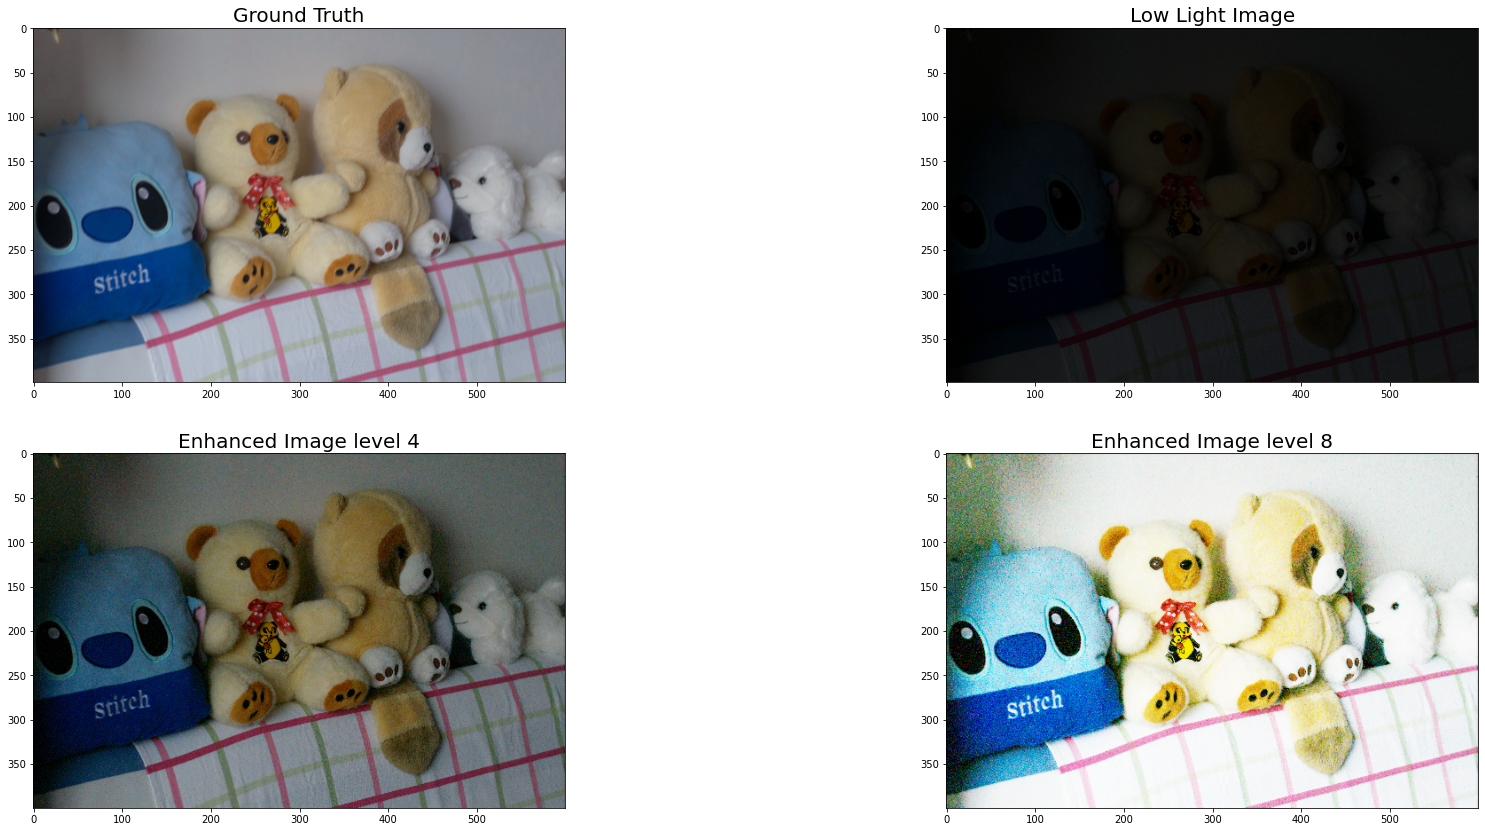

In [39]:
e = 0
plt.figure(figsize=(30,30))

plt.subplot(4,2,1)
plt.title("Ground Truth",fontsize=20)
plt.imshow(high[e])

plt.subplot(4,2,2)
plt.title("Low Light Image",fontsize=20)
plt.imshow(low[e])

plt.subplot(4,2,3)
plt.title("Enhanced Image level 4",fontsize=20)
image4 = enhance(low[e], 4, 1)
plt.imshow(image4)

plt.subplot(4,2,4)
plt.title("Enhanced Image level 8",fontsize=20)
image8 = enhance(low[e], 8, 1)
plt.imshow(image8)

In [0]:
def Enhance(img, index, flag):
    if index == 0:
      return img

    elif flag == 1:
        h, w, c = img.shape
        test = Model.predict(img.reshape(1, h, w, 3))
        temp = img / 255
        image = temp + ((test[0,:,:,:] * temp)*(1-temp))
        index = index - 1
        flag = 0
        return Enhance(image, index, flag)

    else:
        h, w, c = img.shape
        temp = Model.predict(img.reshape(1, h, w, 3))
        image = img + ((temp[0,:,:,:] * img)*(1-img))
        index = index - 1
        return Enhance(image, index, flag)

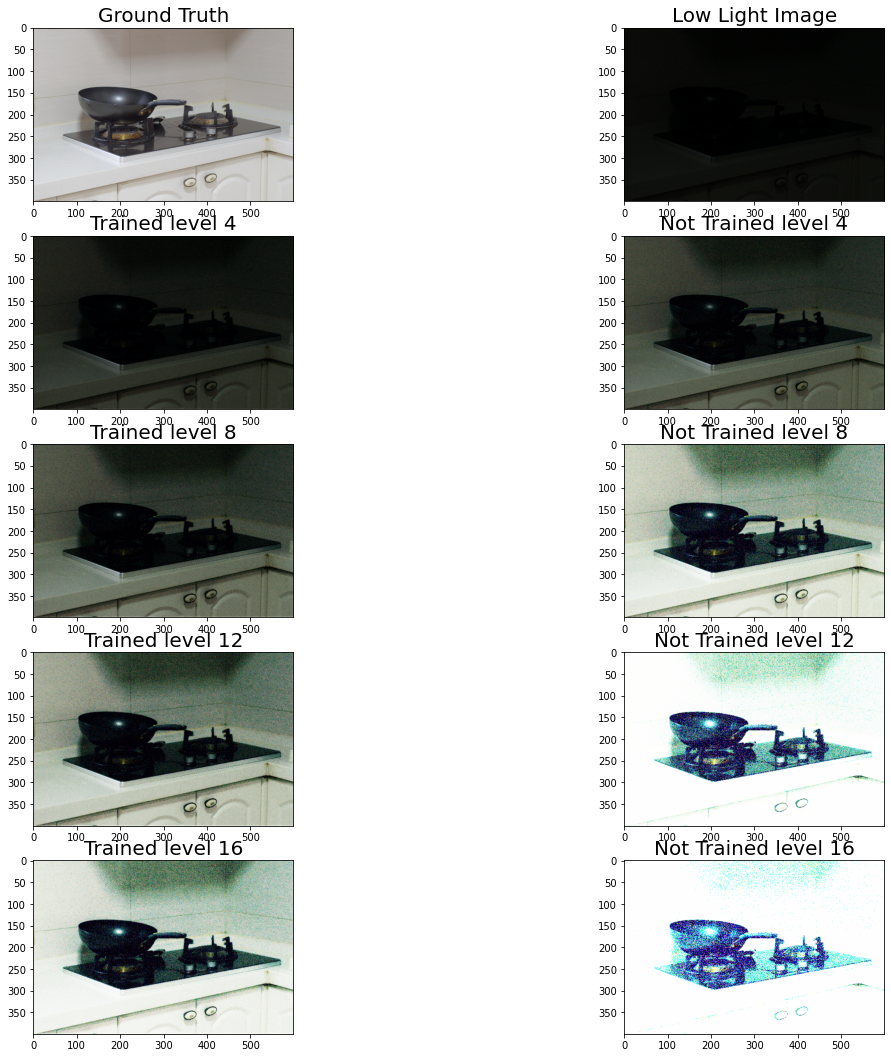

In [49]:
e = 473
IMAGE = low[e]
plt.figure(figsize=(30,30))

plt.subplot(8,3,1)
plt.title("Ground Truth",fontsize=20)
plt.imshow(high[e])

plt.subplot(8,3,2)
plt.title("Low Light Image",fontsize=20)
plt.imshow(IMAGE)



plt.subplot(8,3,4)
plt.title("Trained level 4",fontsize=20)
image4 = Enhance(IMAGE, 4, 1)
plt.imshow(image4)

plt.subplot(8,3,5)
plt.title("Not Trained level 4",fontsize=20)
image8 = enhance(IMAGE, 4, 1)
plt.imshow(image8)


plt.subplot(8,3,7)
plt.title("Trained level 8",fontsize=20)
image4 = Enhance(IMAGE, 8, 1)
plt.imshow(image4)

plt.subplot(8,3,8)
plt.title("Not Trained level 8",fontsize=20)
image8 = enhance(IMAGE, 8, 1)
plt.imshow(image8)

plt.subplot(8,3,10)
plt.title("Trained level 12",fontsize=20)
image4 = Enhance(IMAGE, 12, 1)
plt.imshow(image4)

plt.subplot(8,3,11)
plt.title("Not Trained level 12",fontsize=20)
image8 = enhance(IMAGE, 12, 1)
plt.imshow(image8)



plt.subplot(8,3,13)
plt.title("Trained level 16",fontsize=20)
image4 = Enhance(IMAGE, 16, 1)
plt.imshow(image4)

plt.subplot(8,3,14)
plt.title("Not Trained level 16",fontsize=20)
image8 = enhance(IMAGE, 16, 1)
plt.imshow(image8)
